In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 135s 1us/step


In [25]:
np.unique(y_train)
x_train.shape

(50000, 32, 32, 3)

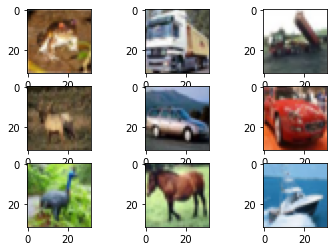

In [146]:
fig,ax = plt.subplots(3,3)
for x in range(3):
    for y in range(3):
        ax[x,y].imshow(x_train[3*x+y])


In [51]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3), name='flatten'),
    keras.layers.BatchNormalization(name='batch_norm'),
    keras.layers.Dense(500, activation='selu', name='dense_2',kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(name='batch_norm_2'),
    keras.layers.Dense(250, activation='selu', name='dense_3',kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(name='batch_norm_3'),
    keras.layers.Dense(125, activation='selu', name='dense_4',kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(name='batch_norm_4'),
    keras.layers.Dense(50, activation='selu', name='dense_5',kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(name='batch_norm_5'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax', name='dense_6')])

In [52]:
def exponential_decay(lr0, s):
 def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
 return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2,callbacks=[keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),lr_scheduler])


Epoch 1/20
1250/1250 [==============================] - 43s 32ms/step - loss: 1.8272 - accuracy: 0.3410 - val_loss: 1.6605 - val_accuracy: 0.3905 - lr: 0.0100
Epoch 2/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.6293 - accuracy: 0.4200 - val_loss: 1.5493 - val_accuracy: 0.4511 - lr: 0.0089
Epoch 3/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5260 - accuracy: 0.4597 - val_loss: 1.5074 - val_accuracy: 0.4596 - lr: 0.0079
Epoch 4/20
1250/1250 [==============================] - 38s 31ms/step - loss: 1.4446 - accuracy: 0.4893 - val_loss: 1.4336 - val_accuracy: 0.4950 - lr: 0.0071
Epoch 5/20
1250/1250 [==============================] - 38s 30ms/step - loss: 1.3851 - accuracy: 0.5092 - val_loss: 1.3687 - val_accuracy: 0.5145 - lr: 0.0063
Epoch 6/20
1250/1250 [==============================] - 38s 31ms/step - loss: 1.3248 - accuracy: 0.5337 - val_loss: 1.3477 - val_accuracy: 0.5227 - lr: 0.0056
Epoch 7/20
1250/1250 [========================

In [54]:
continued_history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0026 - accuracy: 0.6476 - val_loss: 1.2817 - val_accuracy: 0.5570
Epoch 2/20
1250/1250 [==============================] - 43s 35ms/step - loss: 0.9723 - accuracy: 0.6580 - val_loss: 1.3012 - val_accuracy: 0.5595
Epoch 3/20
1250/1250 [==============================] - 43s 34ms/step - loss: 0.9444 - accuracy: 0.6697 - val_loss: 1.3131 - val_accuracy: 0.5592
Epoch 4/20
1250/1250 [==============================] - 40s 32ms/step - loss: 0.9124 - accuracy: 0.6797 - val_loss: 1.3149 - val_accuracy: 0.5552
Epoch 5/20
1250/1250 [==============================] - 43s 34ms/step - loss: 0.8852 - accuracy: 0.6901 - val_loss: 1.3249 - val_accuracy: 0.5619
Epoch 6/20
1250/1250 [==============================] - 38s 30ms/step - loss: 0.8602 - accuracy: 0.6987 - val_loss: 1.3930 - val_accuracy: 0.5539
Epoch 7/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.8324 - accuracy: 0.7092 - val_loss: 1.3924 -

In [121]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [148]:
y_pred_max = np.argmax(y_pred, axis=1).reshape(-1,1)
accuracy = np.sum(y_pred_max == y_test)/len(y_test)
accuracy

0.5364

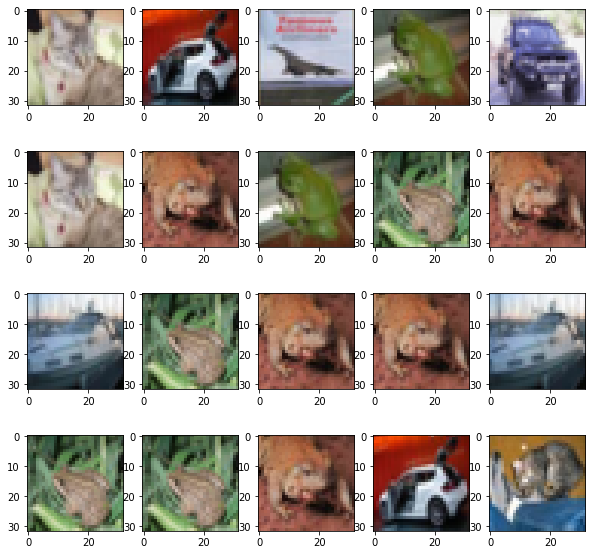

In [145]:
def show_in_subplots(x_data,n,size = 10):
    nrow = np.sqrt(n).astype(int)
    ncol = n//nrow
    fig,ax = plt.subplots(nrow,ncol)
    for x in range(nrow):
        for y in range(ncol):
            ax[x,y].imshow(x_data[ncol*x+y])
    fig.set_size_inches(size,size)


show_in_subplots(x_test[y_test[y_pred_max != y_test]],20)